In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.stats as stats
import numpy.polynomial.polynomial as poly
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from glob import glob
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
print("Hi")
'''
The following code was implemented in Jupyter Notebook
As such, running the code strictly linearly will most likely not yield the same results as we did, 
due to randomized test-train split, the selective running of different cells for 
different X_trains (for feature transformations), and other unforeseen issues.
'''

Hi


In [2]:
#Load data
#Replace with your own directory for where the dataset is
very_mild = glob(r'C:\Dataset\Very_Mild_Demented\*')
mild = glob(r'C:\Dataset\Mild_Demented\*')
moderate = glob(r'C:\Dataset\Moderate_Demented\*')
non = glob(r'C:\Dataset/Non_Demented\*')

def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

In [3]:
#For moderate
N = 64
moderateX = np.array(img.imread(moderate[0]).flatten())
moderateY = np.array([1, 0, 0, 0])
for i in range(1, N):
    x = img.imread(moderate[i]).flatten()
    y = np.array([1, 0, 0, 0])
    moderateX = np.vstack((moderateX, x))
    moderateY = np.vstack((moderateY, y))
#print(moderateX)
#print(moderateY)
print(moderateX.shape)
print(moderateY.shape)

(64, 16384)
(64, 4)


In [4]:
#For non-demented
N = 3200
nonX = np.array(img.imread(non[0]).flatten())
nonY = np.array([0, 1, 0, 0])
for i in range(1, N):
    x = img.imread(non[i]).flatten()
    y = np.array([0, 1, 0, 0])
    nonX = np.vstack((nonX, x))
    nonY = np.vstack((nonY, y))
#print(nonX)
#print(nonY)
print(nonX.shape)
print(nonY.shape)

(3200, 16384)
(3200, 4)


In [5]:
#For very mild
N = 2240
very_mildX = np.array(img.imread(very_mild[0]).flatten())
very_mildY = np.array([0, 0, 1, 0])
for i in range(1, N):
    x = img.imread(very_mild[i]).flatten()
    y = np.array([0, 0, 1, 0])
    very_mildX = np.vstack((very_mildX, x))
    very_mildY = np.vstack((very_mildY, y))
#print(very_mildX)
#print(very_mildY)
print(very_mildX.shape)
print(very_mildY.shape)


(2240, 16384)
(2240, 4)


In [6]:
#For mild
N = 896
mildX = np.array(img.imread(mild[0]).flatten())
mildY = np.array([0, 0, 0, 1])
for i in range(1, N):
    x = img.imread(mild[i]).flatten()
    y = np.array([0, 0, 0, 1])
    mildX = np.vstack((mildX, x))
    mildY = np.vstack((mildY, y))
#print(mildX)
#print(mildY)
print(mildX.shape)
print(mildY.shape)


(896, 16384)
(896, 4)


In [7]:
#for final
finalX = np.vstack((moderateX, mildX, very_mildX, nonX))
finalY = np.vstack((moderateY, mildY, very_mildY, nonY))
print(finalX.shape)
print(finalY.shape)

(6400, 16384)
(6400, 4)


In [8]:
#Logistic Regression
logY = np.hstack((np.zeros(64,), np.ones(3200,), 2 * np.ones(2240,), 3 * np.ones(896,)))
print(logY.shape)

(6400,)


In [9]:
X_new = preprocessing.StandardScaler().fit_transform(finalX)
X_train, X_val, y_train, y_val = train_test_split(X_new, logY, test_size = 0.05, random_state=10, shuffle=True)
#X_train, X_val, y_train, y_val = train_test_split(X_new, logY, test_size = 0.05, random_state=20, shuffle=True)
print("Hello")

Hello


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


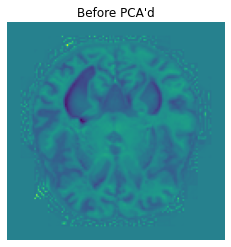

In [10]:
plt.imshow(X_train[0].reshape(128,128))
plt.title("Before PCA'd")
plt.axis('off')
print(X_train[0].reshape(128,128))

In [15]:
#Attempting to Display PCA'd X
X_temp = X_train
pca = PCA(n_components = 1)
pca.fit_transform(X_train)
print(sum(pca.explained_variance_ratio_))

0.1575601113790008
[0. 0. 0. ... 0. 0. 0.]
99614720
(6080, 16384)


(-0.5, 127.5, 127.5, -0.5)

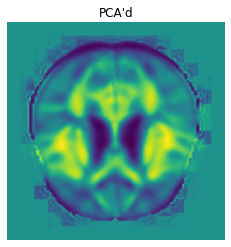

In [21]:
#plt.imshow(X_train[0].reshape(128,128))
plt.imshow(pca.components_.reshape(128,128))
plt.title("PCA'd")
plt.axis('off')

In [ ]:
#Attempting to Display PCA'd X
pca = PCA(n_components = 0)
pca.fit_transform(X_train)
print(sum(pca.explained_variance_ratio_))
plt.imshow(X_train[0].reshape(128,128))
plt.title("PCA'd")
plt.axis('off')

In [10]:
#PCA test
pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[1.57560111e-01 7.08331411e-02 6.31560938e-02 ... 1.45031985e-07
 1.40645019e-07 1.95936243e-32]
6080


In [32]:
pca = PCA(n_components = 1000)
pca.fit_transform(X_train)
print(pca.n_components_)

1000


In [14]:
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 800)
logreg.fit(X_train, y_train)
print("PCA: Logistic regression + l2 regularization, C = .01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
pca.transform(X_val)
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

PCA: Logistic regression + l2 regularization, C = .01
Test accuracy is 100.0%
Val accuracy is 90.0%


In [15]:
pca = PCA(n_components = 500)
pca.fit_transform(X_train)
print(pca.n_components_)
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 800)
logreg.fit(X_train, y_train)
print("PCA: Logistic regression + l2 regularization, C = .01, 500 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
pca.transform(X_val)
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

500
PCA: Logistic regression + l2 regularization, C = .01, 500 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [16]:
pca = PCA(n_components = 100)
pca.fit_transform(X_train)
print(pca.n_components_)
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 800)
logreg.fit(X_train, y_train)
print("PCA: Logistic regression + l2 regularization, C = .01, 100 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
pca.transform(X_val)
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

100
PCA: Logistic regression + l2 regularization, C = .01, 100 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [20]:
pca = PCA(n_components = 1000)
pca.fit_transform(X_train)
pca.transform(X_val)

array([[-47.82467916,  -4.67290957,  33.03229757, ...,   2.16733309,
          2.02913624,   0.34573359],
       [-16.27578754,  17.21566356, -20.70985669, ...,  -0.85920016,
          0.75735391,   1.09107129],
       [ -6.48790473, -55.61872295, -23.98263123, ...,  -1.69722668,
          1.81434675,  -0.86819484],
       ...,
       [-13.51795499, -17.9046691 , -45.50962358, ...,   0.69861256,
         -0.12469063,   0.566023  ],
       [-47.9228473 ,  29.58691093,   9.02833358, ...,   0.71681245,
          1.04611983,  -1.37387607],
       [-52.99379612,  -8.60736157,  25.69547189, ...,  -0.671138  ,
          0.0970157 ,   0.61279829]])

In [27]:
svc = SVC(C = 10, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
print("PCA: SVM + l2 regularization, C = 10, 1000 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

[LibSVM]PCA: SVM + l2 regularization, C = 10, 1000 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [28]:
pca = PCA(n_components = 100)
pca.fit_transform(X_train)
pca.transform(X_val)
svc = SVC(C = 10, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
print("PCA: SVM + l2 regularization, C = 10, 100 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

[LibSVM]PCA: SVM + l2 regularization, C = 10, 100 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [29]:
pca = PCA(n_components = 500)
pca.fit_transform(X_train)
pca.transform(X_val)
svc = SVC(C = 10, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
print("PCA: SVM + l2 regularization, C = 10, 500 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

[LibSVM]PCA: SVM + l2 regularization, C = 10, 500 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [16]:
pca = PCA(n_components = 100)
pca.fit_transform(X_train)
#print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

0.5642183638575813


In [15]:
pca = PCA(n_components = 500)
pca.fit_transform(X_train)
#print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

0.7923033966858707


In [13]:
pca = PCA(n_components = 1000)
pca.fit_transform(X_train)
#print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

0.8885142282592676


In [21]:
pca = PCA(n_components = 15)
pca.fit_transform(X_train)
#print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
pca.transform(X_val)

0.39814622637343294


array([[-47.82467916,  -4.67290957,  33.03229757, ...,  -6.72538231,
         -3.84473358,  -3.52569046],
       [-16.27578754,  17.21566356, -20.70985669, ...,  -1.23718781,
          6.68277659,   3.55511543],
       [ -6.48790473, -55.61872295, -23.98263123, ...,  17.29701346,
         -8.15962085,   6.97500766],
       ...,
       [-13.51795499, -17.9046691 , -45.50962358, ...,   5.66592334,
         -1.89077882,  -6.4601047 ],
       [-47.9228473 ,  29.58691093,   9.02833358, ...,  14.74913281,
         -7.79720576,   1.23879321],
       [-52.99379612,  -8.60736157,  25.69547189, ...,  11.24193596,
         -1.2216681 ,   1.347003  ]])

In [22]:
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 700)
logreg.fit(X_train, y_train)
print("PCA: Logistic regression + l2 regularization, C = .01, 15 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

PCA: Logistic regression + l2 regularization, C = .01, 15 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [31]:
svc = SVC(C = 10, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
print("PCA: SVM + l2 regularization, C = 10, 15 components")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

[LibSVM]PCA: SVM + l2 regularization, C = 10, 15 components
Test accuracy is 100.0%
Val accuracy is 90.0%


In [10]:
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + l2 regularization, C = .01")
#print(logreg.intercept_)
#print(logreg.coef_)

Logistic regression + l2 regularization, C = .01


In [15]:
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Test accuracy is 100.0%
Val accuracy is 90.625%


In [16]:
logreg = LogisticRegression(penalty='l2', C = 0.1, multi_class = 'multinomial', max_iter = 1500)
logreg.fit(X_train, y_train)
print("Logistic regression + l2 regularization, C = .1")

Logistic regression + l2 regularization, C = .1


In [17]:
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Test accuracy is 100.0%
Val accuracy is 90.625%


In [30]:
logreg = LogisticRegression(penalty='l2', C = 1, multi_class = 'multinomial', max_iter = 1600)
logreg.fit(X_train, y_train)
print("Logistic regression + l2 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l2 regularization, C = 1
Test accuracy is 100.0%
Val accuracy is 90.625%


In [32]:
logreg = LogisticRegression(penalty='l2', C = 10, multi_class = 'multinomial', max_iter = 1800)
logreg.fit(X_train, y_train)
print("Logistic regression + l2 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l2 regularization, C = 10
Test accuracy is 100.0%
Val accuracy is 90.0%


In [34]:
logreg = LogisticRegression(penalty='l2', C = 20, multi_class = 'multinomial', max_iter = 2000)
logreg.fit(X_train, y_train)
print("Logistic regression + l2 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l2 regularization, C = 20
Test accuracy is 100.0%
Val accuracy is 89.6875%


In [27]:
logreg = LogisticRegression(penalty='none', multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + no regularization")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + no regularization
Test accuracy is 100.0%
Val accuracy is 84.0625%


In [10]:
logreg = LogisticRegression(penalty='l1', C = 0.01, solver = 'liblinear', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + l1 regularization, C = 0.01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l1 regularization, C = 0.01
Test accuracy is 75.42763157894737%
Val accuracy is 72.5%


In [24]:
logreg = LogisticRegression(penalty='l1', C = 0.1, solver = 'liblinear', max_iter = 1300)
logreg.fit(X_train, y_train)
print("Logistic regression + l1 regularization, C = 0.1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l1 regularization, C = 0.1
Test accuracy is 99.60526315789474%
Val accuracy is 86.5625%


In [11]:
logreg = LogisticRegression(penalty='l1', C = 1, solver = 'liblinear', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + l1 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l1 regularization, C = 1
Test accuracy is 100.0%
Val accuracy is 89.6875%


In [13]:
logreg = LogisticRegression(penalty='l1', C = 10, solver = 'liblinear', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + l1 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l1 regularization, C = 10
Test accuracy is 100.0%
Val accuracy is 88.4375%


In [14]:
logreg = LogisticRegression(penalty='l1', C = 20, solver = 'liblinear', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + l1 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + l1 regularization, C = 20
Test accuracy is 100.0%
Val accuracy is 88.75%


In [12]:
print("hello")

hello


In [11]:
clf = MLPClassifier(alpha=10, hidden_layer_sizes=(10), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10] + l2 regularization, alpha = 10")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10] + l2 regularization, alpha = 10
Test accuracy is 98.83223684210526%
Val accuracy is 88.75%


In [12]:
clf = MLPClassifier(alpha=10, hidden_layer_sizes=(10, 20), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10,20] + l2 regularization, alpha = 10")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10,20] + l2 regularization, alpha = 10
Test accuracy is 97.26973684210526%
Val accuracy is 90.0%


In [10]:
clf = MLPClassifier(alpha=10, hidden_layer_sizes=(10, 20, 30), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10,20,30] + l2 regularization, alpha = 10")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10,20,30] + l2 regularization, alpha = 10
Test accuracy is 98.07565789473685%
Val accuracy is 89.6875%


In [21]:
clf = MLPClassifier(alpha=100, hidden_layer_sizes=(10), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10] + l2 regularization, alpha = 100")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10] + l2 regularization, alpha = 100
Test accuracy is 79.27631578947368%
Val accuracy is 75.625%


In [25]:
clf = MLPClassifier(alpha=100, hidden_layer_sizes=(10, 20), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10,20] + l2 regularization, alpha = 100")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10,20] + l2 regularization, alpha = 100
Test accuracy is 67.26973684210526%
Val accuracy is 64.6875%


In [26]:
clf = MLPClassifier(alpha=100, hidden_layer_sizes=(10, 20, 30), max_iter=1500)
clf.fit(X_train, y_train)
print("Neural Network[10,20,30] + l2 regularization, alpha = 100")
y_pred = clf.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Neural Network[10,20,30] + l2 regularization, alpha = 100
Test accuracy is 49.868421052631575%
Val accuracy is 52.5%


In [ ]:
#Neural network with 10 hidden neurons
clf = MLPClassifier(hidden_layer_sizes = (10,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10], alpha = 0.0001")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with 10 hidden neurons + alpha = 0.01
clf = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (10,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10], alpha = 0.01")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with 10 hidden neurons + alpha = 0.1
clf = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (10,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10], alpha = 0.1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with 10 hidden neurons + alpha = 1
clf = MLPClassifier(alpha = 1, hidden_layer_sizes = (10,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10], alpha = 1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with default alpha = 0.0001
clf = MLPClassifier(random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 0.0001")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network + L2 with alpha = 0.01
clf = MLPClassifier(alpha = 0.01, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 0.01")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20] hidden neurons
clf = MLPClassifier(hidden_layer_sizes = (10, 20,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20], alpha = 0.0001")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20] hidden neurons + alpha = 0.01
clf = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (10, 20,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20], alpha = 0.01")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20] hidden neurons + alpha = 0.1
clf = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (10, 20,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20], alpha = 0.1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20] hidden neurons + alpha = 1
clf = MLPClassifier(alpha = 1, hidden_layer_sizes = (10, 20,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20], alpha = 1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network + L2 with alpha = 0.1
clf = MLPClassifier(alpha = 0.1, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 0.1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network + L2 with alpha = 1
clf = MLPClassifier(alpha = 1, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network + L2 with alpha = 10
clf = MLPClassifier(alpha = 10, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 10")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network + L2 with alpha = 100
clf = MLPClassifier(alpha = 100, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[100], alpha = 100")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20, 30] hidden neurons
clf = MLPClassifier(hidden_layer_sizes = (10, 20, 30,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20, 30], alpha = 0.0001")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20, 30] hidden neurons + alpha = 0.01
clf = MLPClassifier(alpha = 0.01, hidden_layer_sizes = (10, 20, 30,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20, 30], alpha = 0.01")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20, 30] hidden neurons + alpha = 0.1
clf = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (10, 20, 30,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20, 30], alpha = 0.1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#Neural network with [10, 20, 30] hidden neurons + alpha = 1
clf = MLPClassifier(alpha = 1, hidden_layer_sizes = (10, 20, 30,), random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural Network[10, 20, 30], alpha = 1")
print(clf.intercepts_)
print(clf.coefs_)
yhat_tr = clf.predict(X_train)
acc = accuracy_score(y_train, yhat_tr)
print('Training accuracy: {}%'.format(acc * 100))
yhat_val = clf.predict(X_val)
acc = accuracy_score(y_val, yhat_val)
print('Testing accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + L2 with C = 0.01
svc = svm.SVC(C = 0.01, kernel="linear", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + L2 with C = 0.1
svc = svm.SVC(C = 0.1, kernel="linear", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + L2 with C = 1
svc = svm.SVC(C = 1, kernel="linear", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + L2 with C = 10
svc = svm.SVC(C = 10, kernel="linear", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy = {0:f}'.format(acc))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy = {0:f}'.format(acc))

In [ ]:
#SVM + L2 with C = 100
svc = svm.SVC(C = 100, kernel="linear", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + Polynomial Kernel with C = 0.01
svc = svm.SVC(C = 0.01, kernel="poly", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + Polynomial Kernel with C = 0.1
svc = svm.SVC(C = 0.1, kernel="poly", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + Polynomial Kernel with C = 1
svc = svm.SVC(C = 1, kernel="poly", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + Polynomial Kernel with C = 10
svc = svm.SVC(C = 10, kernel="poly", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + Polynomial Kernel with C = 100
svc = svm.SVC(C = 100, kernel="poly", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + RBF Kernel with C = 0.01
svc = svm.SVC(C = 0.01, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + RBF Kernel with C = 0.1
svc = svm.SVC(C = 0.1, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + RBF Kernel with C = 1
svc = svm.SVC(C = 1, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + RBF Kernel with C = 10
svc = svm.SVC(C = 10, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [ ]:
#SVM + RBF Kernel with C = 100
svc = svm.SVC(C = 100, kernel="rbf", verbose=10)
svc.fit(X_train,y_train)
yhat_tr = svc.predict(X_train)
acc = np.mean(yhat_tr == y_train)
print('Training Accuracy: {}%'.format(acc * 100))
yhat_val = svc.predict(X_val)
acc = np.mean(yhat_val == y_val)
print('Testing Accuracy: {}%'.format(acc * 100))

In [15]:
#Squaring the features
X_new = preprocessing.StandardScaler().fit_transform(finalX**2)
X_train, X_val, y_train, y_val = train_test_split(X_new, logY, test_size = 0.05, random_state=10, shuffle=True)

In [11]:
logreg = LogisticRegression(penalty='none', multi_class = 'multinomial', max_iter = 1800)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + no regularization")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + no regularization
Test accuracy is 100.0%
Val accuracy is 54.37499999999999%


In [36]:
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l2 regularization, C = .01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l2 regularization, C = .01
Test accuracy is 100.0%
Prediction accuracy is 57.8125%


In [37]:
logreg = LogisticRegression(penalty='l2', C = 0.1, multi_class = 'multinomial', max_iter = 1500)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l2 regularization, C = .1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l2 regularization, C = .1
Test accuracy is 100.0%
Prediction accuracy is 58.12500000000001%


In [38]:
logreg = LogisticRegression(penalty='l2', C = 1, multi_class = 'multinomial', max_iter = 1600)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l2 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l2 regularization, C = 1
Test accuracy is 100.0%
Val accuracy is 57.8125%


In [39]:
logreg = LogisticRegression(penalty='l2', C = 10, multi_class = 'multinomial', max_iter = 1800)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l2 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l2 regularization, C = 10
Test accuracy is 100.0%
Val accuracy is 57.49999999999999%


In [40]:
logreg = LogisticRegression(penalty='l2', C = 20, multi_class = 'multinomial', max_iter = 2000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l2 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l2 regularization, C = 20
Test accuracy is 100.0%
Val accuracy is 57.49999999999999%


In [17]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.01, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l1 regularization, C = .01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l1 regularization, C = .01
Test accuracy is 66.06907894736842%
Prediction accuracy is 54.6875%


In [19]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.1, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l1 regularization, C = .1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l1 regularization, C = .1
Test accuracy is 99.98355263157895%
Prediction accuracy is 54.6875%


In [20]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 1, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l1 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l1 regularization, C = 1
Test accuracy is 100.0%
Prediction accuracy is 56.875%


In [21]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 10, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l1 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l1 regularization, C = 10
Test accuracy is 100.0%
Prediction accuracy is 55.00000000000001%


In [22]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 20, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + squared features + l1 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + squared features + l1 regularization, C = 20
Test accuracy is 100.0%
Prediction accuracy is 55.3125%


In [24]:
#Cubing the features
X_new = preprocessing.StandardScaler().fit_transform(finalX**3)
X_train, X_val, y_train, y_val = train_test_split(X_new, logY, test_size = 0.05, random_state=10, shuffle=True)
print("hello")

hello


In [25]:
logreg = LogisticRegression(penalty='none', multi_class = 'multinomial', max_iter = 1200)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + no regularization")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + no regularization
Test accuracy is 100.0%
Val accuracy is 44.0625%


In [26]:
logreg = LogisticRegression(penalty='l2', C = 0.01, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l2 regularization, C = .01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l2 regularization, C = .01
Test accuracy is 100.0%
Prediction accuracy is 50.31250000000001%


In [27]:
logreg = LogisticRegression(penalty='l2', C = 0.1, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l2 regularization, C = .1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l2 regularization, C = .1
Test accuracy is 100.0%
Prediction accuracy is 49.0625%


In [28]:
logreg = LogisticRegression(penalty='l2', C = 1, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l2 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l2 regularization, C = 1
Test accuracy is 100.0%
Prediction accuracy is 49.375%


In [29]:
logreg = LogisticRegression(penalty='l2', C = 10, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l2 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l2 regularization, C = 10
Test accuracy is 100.0%
Prediction accuracy is 48.75%


In [30]:
logreg = LogisticRegression(penalty='l2', C = 20, multi_class = 'multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l2 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l2 regularization, C = 20
Test accuracy is 100.0%
Prediction accuracy is 49.0625%


In [31]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.01, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l1 regularization, C = .01")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l1 regularization, C = .01
Test accuracy is 61.809210526315795%
Prediction accuracy is 51.24999999999999%


In [32]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.1, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l1 regularization, C = .1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l1 regularization, C = .1
Test accuracy is 99.98355263157895%
Prediction accuracy is 50.31250000000001%


In [33]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 1, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l1 regularization, C = 1")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l1 regularization, C = 1
Test accuracy is 100.0%
Prediction accuracy is 50.0%


In [34]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 10, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l1 regularization, C = 10")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l1 regularization, C = 10
Test accuracy is 100.0%
Prediction accuracy is 51.24999999999999%


In [35]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear', C = 20, max_iter = 1000)
logreg.fit(X_train, y_train)
print("Logistic regression + cubed features + l1 regularization, C = 20")
y_pred = logreg.predict(X_train)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = logreg.predict(X_val)
print('Prediction accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

Logistic regression + cubed features + l1 regularization, C = 20
Test accuracy is 100.0%
Prediction accuracy is 50.625%


In [72]:
#Transforming X with Poly degree 2 - Too many features
#Needs several TiB of space, without slicing
'''
transform = PolynomialFeatures(degree=2)
polyX_train = transform.fit_transform(X_train)
print(polyX_train.shape)

lreg = linear_model.LinearRegression()
lreg.fit(polyX_train, y2_train)
print("Linear regression + no regularization")
print(lreg.intercept_)
print(lreg.coef_)
'''

(475, 78)
Linear regression + no regularization
1156015696480714.5
[-1.15601570e+15 -1.75165380e+15 -5.73692985e+00  2.42349146e+00
 -1.15578745e+00  6.66358241e+00  6.52777649e+00  2.86162299e+00
  8.24154261e+00  1.78125000e+00  4.46875000e+00 -2.53125000e+00
  1.24838477e+15 -9.91544563e+14 -1.87040207e+15  1.21171149e+15
  9.42494855e+14  1.92670120e+14 -1.13478520e+15  4.35183497e+14
 -1.99308168e+15  2.79384768e+15  8.22485391e+14 -1.40625000e-01
 -2.50000000e+00 -1.17187500e+00 -5.62500000e-01  4.56250000e+00
 -2.75000000e+00 -1.87500000e-01  6.06250000e+00 -6.25000000e+00
  5.37500000e+00 -3.53906250e+00  1.06250000e+00 -5.12500000e+00
  6.46875000e+00  6.87500000e+00 -4.87500000e+00 -6.25000000e-01
  2.20312500e+00  5.56250000e+00 -1.00000000e+00  6.34375000e+00
  3.35156250e+00  4.40625000e+00  8.12500000e+00 -3.28906250e+00
  9.84375000e-01  2.34375000e+00 -1.87500000e-01 -4.85937500e+00
 -8.25000000e+00 -3.31250000e+00  8.78125000e+00 -1.11718750e+00
 -1.87500000e+00  1.812

In [ ]:
X_new = preprocessing.StandardScaler().fit_transform(finalX)
X_train, X_val, y_train, y_val = train_test_split(X_new, logY, test_size = 0.05, random_state=10, shuffle=True)
print("Hello")

In [29]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3, 2), random_state=1, max_iter=2000)
clf.fit(X_train, y_train)
print("Neural Network + l2 regularization, alpha = 1e-5")
print("hello")

Neural Network + l2 regularization, alpha = 1e-5
hello


In [30]:
print(clf.intercepts_)
print(clf.coefs_)
y_pred = clf.predict(X_train)
print(y_val.shape)
print('Test accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
y_pred = clf.predict(X_val)
print('Val accuracy is {}%'.format(accuracy_score(y_val, y_pred) * 100))

[array([ 0.11725884, -0.31365786, -0.12674229, -0.4146353 , -0.51415272]), array([15.61326176, -0.19105061,  0.0656996 ]), array([12.46862568, -0.4010712 ]), array([-3.50727229, -5.03997249,  5.51392448,  1.05215259])]
[array([[-0.00317514,  0.00843069, -0.01912806, -0.00756372, -0.01351684],
       [-0.01559911, -0.01200522, -0.0059096 , -0.00395018,  0.00148532],
       [-0.00309201,  0.0070874 , -0.0113091 ,  0.01446862, -0.01808446],
       ...,
       [-0.0059324 , -0.01410272,  0.00279417, -0.01563012, -0.01093436],
       [ 0.0003528 ,  0.00432246, -0.00372503, -0.00722881,  0.00452793],
       [-0.00104972,  0.01508925, -0.01369504, -0.00543454,  0.01117801]]), array([[ 1.75369945, -0.94480827, -1.05595654],
       [-1.25194651,  0.22834168,  0.86966999],
       [-0.84946556, -0.24644062,  0.43195997],
       [-0.87501135, -0.61483635,  1.08522852],
       [-1.42902772,  0.78659292,  0.49206844]]), array([[15.79693745, -0.28162178],
       [-0.25497082, -0.11095993],
       [-0